In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#### Загружаем данные

In [74]:
df = pd.read_csv('datasets\Raman-SBN-50-Pt-Si\SBN-Pt-Si-norm.csv', header=-1, delimiter=';')
df.columns = ['Freq'] + list(range(300, 710, 10))
df.head(3)

,Freq,300,310,320,330,340,350,360,370,380,...,610,620,630,640,650,660,670,680,690,700
0,988.543,0.609399,0.000000,0.000000,0.000000,0.481621,0.000000,0.000000,0.000000,0.190088,...,0.000000,0.000000,0.243674,0.318563,0.000000,0.700006,0.000000,2.224604,1.996143,0.028158
1,986.950,0.535293,0.117025,0.594076,0.091442,0.000000,0.224715,0.446028,0.576077,0.000000,...,1.177262,0.476033,0.000000,0.713369,1.638966,1.309770,0.741272,0.000000,0.644730,0.000000
2,985.357,1.074268,0.025251,0.869792,0.458796,0.408497,0.051140,0.272926,0.577659,0.626860,...,1.709906,0.876837,1.984204,0.000000,1.079475,1.072225,0.694947,1.116124,1.295746,0.139004


#### Сглаживаем спектры используя Savitzky-Golay filter
Сначало пример с одним спектром

In [75]:
y_noise = df[300]
y_sg = scipy.signal.savgol_filter(y_noise, 41, 3)

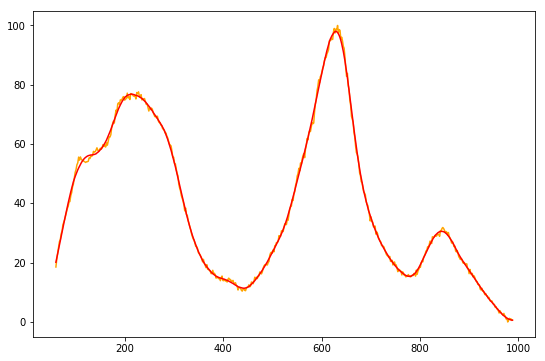

In [76]:
plt.figure(figsize=(9, 6))
plt.plot(df['Freq'], y_noise, color='orange')
plt.plot(df['Freq'], y_sg, color='r')
plt.show()

Сглаживаем все спектры в датасете

In [77]:
df_sm = pd.DataFrame()
df_sm["Freq"] = df["Freq"]
for temp in range(300, 710, 10):
    y_noise = df[temp]
    df_sm[temp] = scipy.signal.savgol_filter(y_noise, 41, 3)

#### Уменьшаем количество признаков в датасети, выбирая некоторый интеревал в спектрах

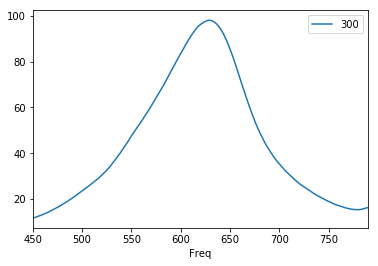

In [89]:
df_sm_cut = df_sm[(df_sm['Freq']>450) & (df_sm['Freq']<790)]
df_sm_cut.plot('Freq', 300)

#### Подготавливаем данные для классификации.
Убираем колонку с частотами, такони одинаковые для всех температур. И транспонируем датафрейм, считаем что каждое значение интенсивности является отдельным признаком.

In [90]:
data = df_sm_cut.drop(['Freq'], axis=1)
data = data.T

#### Применяем алгоритм классификации K-means

In [91]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

##### Создаем словарь "метка - класс"

In [92]:
class_labels = dict(zip(data.index, kmeans.labels_))
# class_labels

##### Печатаем графики для разных классов

In [93]:
labels_class0 = []
labels_class1 = []
for x,y in class_labels.items():
    if y == 0:
        labels_class0.append(x)
    elif y == 1:
        labels_class1.append(x)

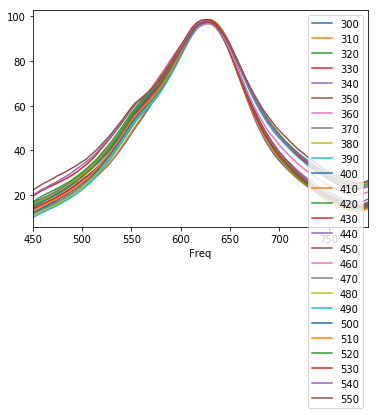

In [94]:
df_sm.plot(x='Freq',y =labels_class0)

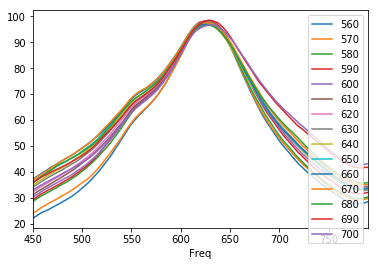

In [95]:
df_sm.plot(x='Freq',y =labels_class1)

#### Уменьшаем размерность данных с помощью PCA

In [96]:
# вернемся к полному спектру
data = df_sm.drop(['Freq'], axis=1)
data = data.T

In [97]:
pca = PCA(n_components=15)
X_reduced =pca.fit_transform(data)

In [98]:
kmeans.fit(X_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [99]:
class_labels = dict(zip(data.index, kmeans.labels_))
class_labels

{300: 1,
 310: 1,
 320: 1,
 330: 1,
 340: 1,
 350: 1,
 360: 1,
 370: 1,
 380: 1,
 390: 1,
 400: 1,
 410: 1,
 420: 1,
 430: 1,
 440: 1,
 450: 1,
 460: 1,
 470: 1,
 480: 1,
 490: 1,
 500: 1,
 510: 1,
 520: 1,
 530: 1,
 540: 1,
 550: 1,
 560: 0,
 570: 0,
 580: 0,
 590: 0,
 600: 0,
 610: 0,
 620: 0,
 630: 0,
 640: 0,
 650: 0,
 660: 0,
 670: 0,
 680: 0,
 690: 0,
 700: 0}